# Plik treningowy NUMPY by BC

# https://opencv.org/
# https://opencv.org/?s=tutorial
# https://docs.opencv.org/4.x/d9/df8/tutorial_root.html 
# https://www.geeksforgeeks.org/opencv-python-tutorial/

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import os,sys

Basic 

/home/cerber/ai


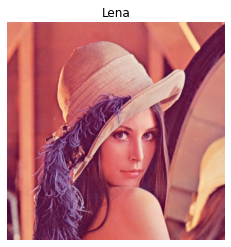

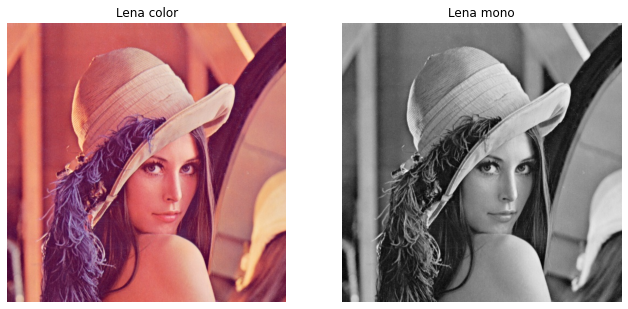

In [12]:
image_path = 'Lena.jpg'
# print(os.getcwd())
image = cv2.imread( os.path.join(os.getcwd(), image_path) )

# skonwertuj paletę kolorów
image = cv2.cvtColor( image, cv2.COLOR_BGR2RGB )

# i już możemy wyświetlić (warto zrobić oddzielną procedurę)
plt.imshow( image )
plt.title( 'Lena' )
plt.axis( 'off' )
plt.show()


# z kolorami możemy podziałać dalej - np. skonwertować do monochrome (grayscale)
mono_image = cv2.cvtColor( image, cv2.COLOR_RGB2GRAY )

# żeby porównać warto wyświetlić koło siebie 
fig, axs = plt.subplots( 1, 2, figsize=( 11, 7 ) )

axs[ 0 ].imshow( image )
axs[ 0 ].set_title( 'Lena color' )
axs[ 0 ].axis( 'off' )

axs[ 1 ].imshow( mono_image, cmap = 'gray' )
axs[ 1 ].set_title( 'Lena mono' )
axs[ 1 ].axis( 'off' )

plt.show()


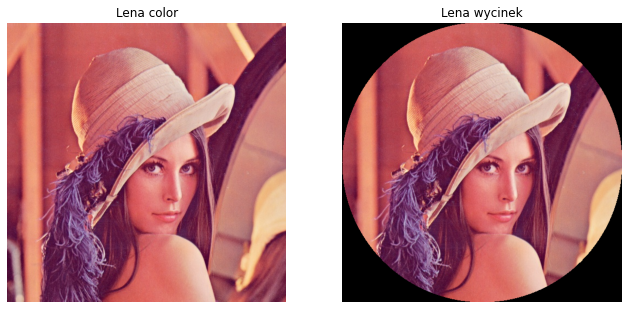

In [13]:
# tu może być list z obrazkami
image_path = 'Lena.jpg'
# print(os.getcwd())
image = cv2.imread( os.path.join(os.getcwd(), image_path) )

# tworzymy maskę, zaczynami od samych zer ale o tym samym wymiarze co obraz
maska = np.zeros_like( image )


# zdefiniujmy gdzie ją chcemy umieścić
h, w = image.shape[ :2 ]
centrum = ( w // 2, h // 2 )
promien = min( centrum )

# wyrysujmy maskę
cv2.circle( maska, centrum, promien, ( 255, 255, 255 ), -1 )

# zblendujmy obraz z maską
image_mask = cv2.bitwise_and( image, maska )



# żeby porównać warto wyświetlić obok siebie 
fig, axs = plt.subplots( 1, 2, figsize=( 11, 7 ) )

axs[ 0 ].imshow( cv2.cvtColor( image, cv2.COLOR_BGR2RGB ) )
axs[ 0 ].set_title( 'Lena color' )
axs[ 0 ].axis( 'off' )

axs[ 1 ].imshow( cv2.cvtColor( image_mask, cv2.COLOR_BGR2RGB ) )
axs[ 1 ].set_title( 'Lena wycinek' )
axs[ 1 ].axis( 'off' )

plt.show()

Kolory

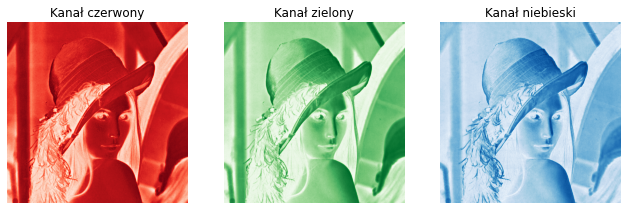

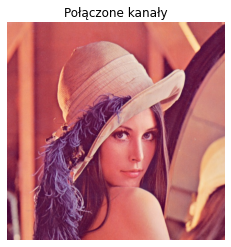

In [14]:
# tu może być list z obrazkami
image_path = 'Lena.jpg'
# print(os.getcwd())
image = cv2.imread( os.path.join(os.getcwd(), image_path) )

# kolejność w OpenCV jest: B - G - R
B, G, R = cv2.split( image )

# wyświetlamy każdą z warstw koloru w oddzielnym oknie
fig, axs = plt.subplots( 1, 3, figsize = (11, 7) )

axs[ 0 ].imshow( R, cmap = 'Reds' )
axs[ 0 ].set_title( 'Kanał czerwony' )
axs[ 0 ].axis( 'off' )

axs[ 1 ].imshow( G, cmap = 'Greens' )
axs[ 1 ].set_title( 'Kanał zielony' )
axs[ 1 ].axis( 'off' )

axs[ 2 ].imshow( B, cmap = 'Blues' )
axs[ 2 ].set_title( 'Kanał niebieski' )
axs[ 2 ].axis( 'off' )    

plt.show()    


# ale tak jak je rozdzililiśmy, to teraz możemy je połączyć
merged_image = cv2.merge( [ R, G, B ] )

plt.imshow( merged_image ) # cv2.cvtColor( merged_image, cv2.COLOR_BGR2RGB ) )
plt.title( 'Połączone kanały' )
plt.axis( 'off' )     

plt.show()    

Histogramy

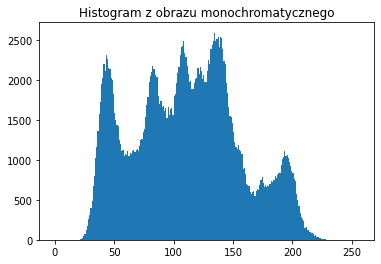

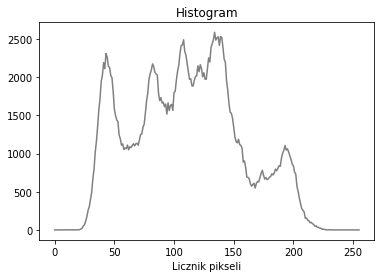

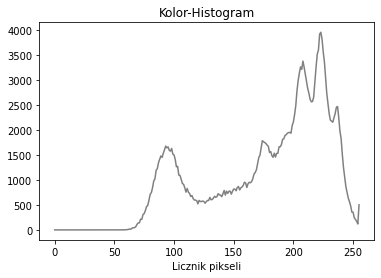

In [15]:
# tu może być list z obrazkami
image_path = 'Lena.jpg'
# print(os.getcwd())
image = cv2.imread( os.path.join(os.getcwd(), image_path) )


# histogram możemy od razu wyrysować - są to częstości występowania wartości pikseli
mono_image = cv2.cvtColor( image, cv2.COLOR_RGB2GRAY )
# ravel() służy do spłaszczenia tensora (było na wykładzie)
fig = plt.figure()
plt.hist( mono_image.ravel(), 256, [ 0, 256 ] )
plt.title( 'Histogram z obrazu monochromatycznego' )
plt.show()


# CV2 też ma funkcję do histogramu
histogram = cv2.calcHist( [ mono_image ], [ 0 ], None, [ 256 ], [ 0,256 ] )
fig2 = plt.figure()    
plt.plot( histogram, color = 'gray' )
plt.title( 'Histogram' )
plt.xlabel( 'Intensywność' )     
plt.xlabel( 'Licznik pikseli' )

plt.show()   


# histogramy z kanałów koloru
histogramy = [ cv2.calcHist( [ image ], [ c ], None, [ 256 ], [ 0, 256 ] ) for c in range( 3 ) ]

fig3 = plt.figure()    
plt.plot( histogramy[ 2 ], color = 'gray' ) # , histogramy[ 1 ], histogramy[ 2 ]
#plt.xlim( [ 0, 256 ] )

# color = ('r', 'g', 'b')
# for i, col in enumerate(color):
#     histogramy = cv2.calcHist( [ image ] , [ i ], None, [ 256 ], [ 0, 256 ] )
#     plt.plot( histogramy, color = col )
#     plt.xlim( [ 0, 256 ] )

plt.title( 'Kolor-Histogram' )
plt.xlabel( 'Intensywność' )     
plt.xlabel( 'Licznik pikseli' )

plt.show()  